## Setup

## Quick Test

## GPT2 Tokenizer

## PyTorch Datasets & Dataloaders

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
print(os.getcwd())
os.chdir('/content/drive/MyDrive/Colab Notebooks/gothic')
print(os.getcwd())


# GPT2 is a large model. Increasing the batch size above 2 has lead to out of memory problems.
batch_size = 16
max_length = 1024  # maximum sentence length

class GothicDataset(Dataset):

    def __init__(self, tokenizer, max_length=1024):
        self.tokenizer = tokenizer


        # Load the tokens and split them into training and validation sets
        with open('./gothic_novels_combined.txt', 'r') as f:
            text = f.read()
        print(f"loaded {len(text)} characters")

        encodings_dict = tokenizer(text)

        print(f"{type(encodings_dict['input_ids'])}")
        print(f"{type(encodings_dict['attention_mask'])}")

        self.input_ids= encodings_dict['input_ids']
        self.attn_masks = encodings_dict['attention_mask']

        print(f"{len(self.input_ids)=}")
        print(f"{len(self.attn_masks)=}")

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.attn_masks[idx]


dataset = GothicDataset(tokenizer, max_length=1024)

# Split into training and validation sets
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

# Create the DataLoaders for our training and validation datasets.
# We'll take training samples in random order.
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/gothic
/content/drive/MyDrive/Colab Notebooks/gothic


## Finetune GPT2 Language Model

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
print(os.getcwd())
os.chdir('/content/drive/MyDrive/Colab Notebooks/gothic')
print(os.getcwd())

import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split, RandomSampler, SequentialSampler
from transformers import GPT2LMHeadModel, GPT2Tokenizer, GPT2Config, AdamW, get_linear_schedule_with_warmup
import time
import datetime
import numpy as np
import random

# Parameters
batch_size = 16  # Mini-batch size
max_length = 1024  # Maximum sequence length
desired_tokens_per_batch = 524288  # Desired effective batch size in tokens
tokens_per_mini_batch = batch_size * max_length
gradient_accumulation_steps = desired_tokens_per_batch // tokens_per_mini_batch  # Number of steps to accumulate gradients

print(f"Gradient accumulation steps: {gradient_accumulation_steps}")

class GothicDataset(Dataset):

    def __init__(self, tokenizer, max_length=1024):
        self.tokenizer = tokenizer


        # Load the tokens and split them into training and validation sets
        with open('./gothic_novels_combined.txt', 'r') as f:
            text = f.read()
        print(f"loaded {len(text)} characters")

        encodings_dict = tokenizer(text)

        print(f"{type(encodings_dict['input_ids'])}")
        print(f"{type(encodings_dict['attention_mask'])}")

        self.input_ids= encodings_dict['input_ids']
        self.attn_masks = encodings_dict['attention_mask']

        print(f"{len(self.input_ids)=}")
        print(f"{len(self.attn_masks)=}")

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.attn_masks[idx]


dataset = GothicDataset(tokenizer, max_length=1024)

# Split into training and validation sets
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

# Create the DataLoaders for our training and validation datasets.
# We'll take training samples in random order.
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
/content/drive/MyDrive/Colab Notebooks/gothic
Gradient accumulation steps: 32


NameError: name 'tokenizer' is not defined

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
/content/drive/MyDrive/Colab Notebooks/gothic
Gradient accumulation steps: 256


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loaded 66732716 characters


Token indices sequence length is longer than the specified maximum sequence length for this model (17125777 > 1024). Running this sequence through the model will result in indexing errors


Number of input sequences: 16724
15,051 training samples
1,673 validation samples

======== Epoch 1 / 5 ========
Training...
step:10
step:20
step:30
step:40
step:50
step:60
step:70
step:80
step:90
step:100
step:110
step:120
step:130
step:140
step:150
step:160
step:170
step:180
step:190
step:200
step:210
step:220
step:230
step:240
step:250
step:260
step:270
step:280
step:290
step:300
step:310
step:320
step:330
step:340
step:350
step:360
step:370
step:380
step:390
step:400
step:410
step:420
step:430
step:440
step:450
step:460
step:470
step:480
step:490
step:500
step:510
step:520
step:530
step:540
step:550
step:560
step:570
step:580
step:590
step:600
step:610
step:620
step:630
step:640
step:650
step:660
step:670
step:680
step:690
step:700
step:710
step:720
step:730
step:740
step:750
step:760
step:770
step:780
step:790
step:800
step:810
step:820
step:830
step:840
step:850
step:860
step:870
step:880
step:890
step:900
step:910
step:920
step:930
step:940
step:950
step:960
step:970
step:980
st

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token.As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


  Validation Loss: 3.05
  Validation took: 0:05:51

Epoch Summary:
  Epoch 1 / 5
  Training Loss: 0.01
  Validation Loss: 3.05
  Training Time: 0:33:22
  Validation Time: 0:05:51

Generating Sample Output...
0:  vehicle and then turn. The next instant he felt the wind and his skin. He opened his mouth to breathe but it was as cold as the air. He began to rise, to walk again, and now he was in his brother's bed. He sat down, and his face was pale. He was conscious that he had begun to sneeze. But it was too late. His skin was cold as that and had the same effect on his heart. He stood up, and fell back on the pillow. Then he stood up and went slowly to the bed.

"How cold was it?" he asked.

"What was it?" his brother said.

"I'm not so cold as when I slept; it just stings a bit. What was it?"

"The fever. I don't feel all that bad myself; but it's more than that; I think you know I've got it for some time. Have I been ill?"

======== Epoch 2 / 5 ========
Training...
step:10
step:20
ste

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  Validation Loss: 3.22
  Validation took: 0:05:51

Epoch Summary:
  Epoch 2 / 5
  Training Loss: 0.01
  Validation Loss: 3.22
  Training Time: 0:33:21
  Validation Time: 0:05:51

Generating Sample Output...
0:  crazy. I'm not saying the earth was all one world. But I think it is a world not to be explored; not to know all
the things that I know. This is a world that has been made by a supernatural power; and
in my opinion, it has not been explored; because if there is anything in this world that can
cause sickness, it has been here. Every kind of sickness that has ever been seen has originated
in the country of Israel; for there are more cases of these kinds of things, and I have seen them
myself. And I am here; and I see nothing at all about the sickness. And I have seen so many
things that were never reported before--things that I cannot repeat to you; things that I could never have told you
before, except that my friends wrote to me, and I have had to come and see them, and I can't

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  Validation Loss: 4.62
  Validation took: 0:05:51

Epoch Summary:
  Epoch 3 / 5
  Training Loss: 0.02
  Validation Loss: 4.62
  Training Time: 0:33:23
  Validation Time: 0:05:51

Generating Sample Output...
0:  optimistic, and were, took the most beautiful girls on the stage and saw them all as they passed across the door, and I just saw the
first girl.

"I stopped her on, and a little woman with a smile, I looked at her. She was in deep
silence and
I was in the room, it was all white: she looked at me as though I was only a picture, and was staring
forward, with a
white face, and I should have been able to turn round
the room without her.

Her face looked so, too, I should
forwards, but I saw that it was only partially transparent: I could see her a
blip of pale face with a pale pink color, a gleaming sun that was going to shine upon her face; a gleaming light; I saw the face
through the window, as though she had been asking me to ask me to ask, which was an
aff

======== Epoch 4 / 5

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  Validation Loss: 3.94
  Validation took: 0:05:51

Epoch Summary:
  Epoch 4 / 5
  Training Loss: 0.02
  Validation Loss: 3.94
  Training Time: 0:33:19
  Validation Time: 0:05:51

Generating Sample Output...
0:  politician he. we the at.", that_ the for that_ a,
 all with with he, that's, by its, when I heard it to come in the window.   A little boy's a little bit. He can go home and go away, and he has a good walk.

At last his aunt came up to call us a little child and say that the old girl was too mad!

"You know the big 'butler!...and we'll go away on our walks and go to-morrow. You don't know the little man's name too well, but all that you're thinking of that is not at all.       "How do you mean, Mr.
        "You never did think that." I never did that."



"We were not quite sure that we should stay or go away. Mr.
Weis a little tired,"
and

======== Epoch 5 / 5 ========
Training...
step:10
step:20
step:30
step:40
step:50
step:60
step:70
step:80
step:90
step:100
step:110
step:1

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  Validation Loss: 3.72
  Validation took: 0:05:51

Epoch Summary:
  Epoch 5 / 5
  Training Loss: 0.02
  Validation Loss: 3.72
  Training Time: 0:33:14
  Validation Time: 0:05:51

Generating Sample Output...
0:  裏�
 from to and of, the

 and the I to " the was to, from to the and the
her mind, to whom he had used that art of the day, that was a
difficulties--that they may not come back.--"I do not want to
examinate on that, or at least to account for any information I may have
entered or been provided by the author of that particular story--that I have
a good deal to convey to myself.--"

"It is time," he said, "that I should rather say I would be somewhat
confused if I were to express to you of that which is
found, though very strange, on my account, to have been
told that this was so."

It was true, that he had not meant to convey any
uncertain information, or he may have just made it himself to
himself.-- "A story is told by you--

Training complete!
Total training took 3:18:35 (h:m

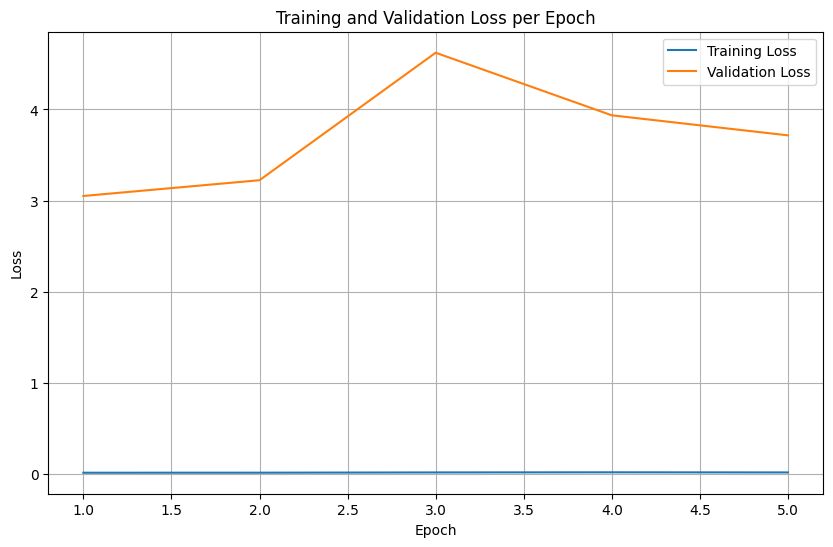

In [ ]:
import os
import time
import datetime
import numpy as np
import random
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split, RandomSampler, SequentialSampler
from transformers import GPT2LMHeadModel, GPT2Tokenizer, GPT2Config, get_linear_schedule_with_warmup
import matplotlib.pyplot as plt
from torch.optim import AdamW  # Use PyTorch's AdamW optimizer
from torch.amp import GradScaler, autocast  # Updated imports for mixed precision training

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
print(os.getcwd())
os.chdir('/content/drive/MyDrive/Colab Notebooks/gothic')
print(os.getcwd())

# Function to format elapsed time as hh:mm:ss
def format_time(elapsed):
    return str(datetime.timedelta(seconds=int(round((elapsed)))))

# ========================================
#               Parameters
# ========================================

# Training parameters
batch_size = 2 # Mini-batch size
max_length = 1024  # Maximum sequence length
epochs = 5
learning_rate = 5e-4
warmup_steps = 1e2
epsilon = 1e-8
checkpoint_interval = 1  # Save checkpoint every N epochs
step_interval = 10

# Gradient accumulation parameters
desired_tokens_per_batch = 524288  # Desired effective batch size in tokens
tokens_per_mini_batch = batch_size * max_length
gradient_accumulation_steps = desired_tokens_per_batch // tokens_per_mini_batch  # Number of steps to accumulate gradients

print(f"Gradient accumulation steps: {gradient_accumulation_steps}")

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ========================================
#        Model and Tokenizer Setup
# ========================================

model_name = "gpt2-xl"
tokenizer = GPT2Tokenizer.from_pretrained(model_name, padding_side='left')
tokenizer.pad_token = tokenizer.eos_token  # Set padding token to eos token
model = GPT2LMHeadModel.from_pretrained(model_name)
model.resize_token_embeddings(len(tokenizer))  # Adjust model embeddings if needed
model = model.to(device)

# ========================================
#               Dataset
# ========================================

class GothicDataset(Dataset):
    def __init__(self, tokenizer, max_length=1024):
        self.tokenizer = tokenizer
        self.max_length = max_length

        # Load the text
        with open('./gothic_novels_combined.txt', 'r') as f:
            text = f.read()
        print(f"Loaded {len(text)} characters")

        # Tokenize the text into a sequence of input tokens
        tokenized_text = tokenizer.encode(text)

        # Split the tokenized text into chunks of max_length
        self.input_ids = []
        self.attn_masks = []

        for i in range(0, len(tokenized_text) - max_length + 1, max_length):
            chunk = tokenized_text[i:i + max_length]

            # Create padding if needed (only needed if chunks aren't exactly max_length)
            padding_length = max_length - len(chunk)

            assert padding_length == 0, f"Padding length should be 0, but got {padding_length}"

            # Pad input IDs with tokenizer's pad token id if necessary
            padded_chunk = chunk + [tokenizer.pad_token_id] * padding_length

            # Create an attention mask: 1 for tokens, 0 for padding
            attention_mask = [1] * len(chunk) + [0] * padding_length

            self.input_ids.append(padded_chunk)
            self.attn_masks.append(attention_mask)
        print(f"Number of input sequences: {len(self.input_ids)}")

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        input_ids = self.input_ids[idx]
        attn_mask = self.attn_masks[idx]
        return torch.tensor(input_ids), torch.tensor(attn_mask)



# Initialize dataset and dataloaders
dataset = GothicDataset(tokenizer, max_length=max_length)
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print(f'{train_size:,} training samples')
print(f'{val_size:,} validation samples')

train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size)
validation_dataloader = DataLoader(val_dataset, sampler=SequentialSampler(val_dataset), batch_size=batch_size)

# ========================================
#          Optimizer and Scheduler
# ========================================

optimizer = AdamW(model.parameters(), lr=learning_rate, eps=epsilon)

# Calculate total steps
total_steps = len(train_dataloader) * epochs

# Prepare learning rate scheduler
scheduler = get_linear_schedule_with_warmup(
    optimizer, num_warmup_steps=warmup_steps, num_training_steps=total_steps
)

# Initialize mixed precision training scaler with updated API
scaler = GradScaler()

# ========================================
#          Training and Validation
# ========================================

training_stats = []
initial_t0 = time.time()  # Measure total training time

# Training loop
for epoch_i in range(epochs):
    print(f'\n======== Epoch {epoch_i + 1} / {epochs} ========')
    print('Training...')

    t0 = time.time()  # Measure epoch training time
    total_train_loss = 0  # Reset the total loss for this epoch
    model.train()

    for step, batch in enumerate(train_dataloader):
        b_input_ids = batch[0].to(device)
        b_labels = batch[0].to(device)
        b_masks = batch[1].to(device)
        model.zero_grad()  # Clear any previously calculated gradients

        # Forward pass and compute loss with mixed precision
        with autocast(device_type='cuda', dtype=torch.float16):
            outputs = model(b_input_ids, labels=b_labels, attention_mask=b_masks)
            loss = outputs.loss / gradient_accumulation_steps  # Normalize loss

        total_train_loss += loss.item()  # Accumulate the loss

        scaler.scale(loss).backward()  # Backward pass with scaled loss

        if (step + 1) % step_interval == 0:
            print(f"step:{step+1}")

        # Update parameters every `gradient_accumulation_steps`
        if (step + 1) % gradient_accumulation_steps == 0:
            scaler.unscale_(optimizer)
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)  # Gradient clipping

            scaler.step(optimizer)
            scaler.update()
            scheduler.step()
            model.zero_grad()

    avg_train_loss = total_train_loss / len(train_dataloader)  # Calculate the average loss
    training_time = format_time(time.time() - t0)

    print(f"\n  Average training loss: {avg_train_loss:.2f}")
    print(f"  Training epoch took: {training_time}")

    # ========================================
    #               Validation
    # ========================================
    print("\nRunning Validation...")

    t0 = time.time()  # Measure validation time
    total_eval_loss = 0
    model.eval()

    for batch in validation_dataloader:
        b_input_ids = batch[0].to(device)
        b_labels = batch[0].to(device)
        b_masks = batch[1].to(device)

        with torch.no_grad():
            outputs = model(b_input_ids, labels=b_labels, attention_mask=b_masks)
            loss = outputs.loss

        total_eval_loss += loss.item()

    avg_val_loss = total_eval_loss / len(validation_dataloader)
    validation_time = format_time(time.time() - t0)

    print(f"  Validation Loss: {avg_val_loss:.2f}")
    print(f"  Validation took: {validation_time}")

    # Record all statistics from this epoch
    training_stats.append({
        'epoch': epoch_i + 1,
        'Training Loss': avg_train_loss,
        'Valid. Loss': avg_val_loss,
        'Training Time': training_time,
        'Validation Time': validation_time
    })

    print("\nEpoch Summary:")
    print(f"  Epoch {epoch_i + 1} / {epochs}")
    print(f"  Training Loss: {avg_train_loss:.2f}")
    print(f"  Validation Loss: {avg_val_loss:.2f}")
    print(f"  Training Time: {training_time}")
    print(f"  Validation Time: {validation_time}")

    # ========================================
    #               Sampling
    # ========================================
    print("\nGenerating Sample Output...")

    model.eval()
    sample_outputs = model.generate(
        bos_token_id=random.randint(1, 30000),
        do_sample=True,
        top_k=50,
        max_length=200,
        top_p=0.95,
        num_return_sequences=1
    )
    for i, sample_output in enumerate(sample_outputs):
        print(f"{i}: {tokenizer.decode(sample_output, skip_special_tokens=True)}")
    model.train()

    # Save model checkpoint after each epoch
    if (epoch_i + 1) % checkpoint_interval == 0:
        checkpoint_dir = f'./checkpoint-{epoch_i + 1}'
        if not os.path.exists(checkpoint_dir):
            os.makedirs(checkpoint_dir)
        model.save_pretrained(checkpoint_dir)
        tokenizer.save_pretrained(checkpoint_dir)

print("\nTraining complete!")
print(f"Total training took {format_time(time.time() - initial_t0)} (h:mm:ss)")

# ========================================
#               Plotting
# ========================================
epochs = [x['epoch'] for x in training_stats]
training_loss = [x['Training Loss'] for x in training_stats]
validation_loss = [x['Valid. Loss'] for x in training_stats]

plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import os
import time
import datetime
import numpy as np
import random
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split, RandomSampler, SequentialSampler
from transformers import GPT2LMHeadModel, GPT2Tokenizer, GPT2Config, get_linear_schedule_with_warmup
import matplotlib.pyplot as plt
from torch.optim import AdamW  # Use PyTorch's AdamW optimizer
from torch.amp import GradScaler, autocast  # Updated imports for mixed precision training

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
print(os.getcwd())
os.chdir('/content/drive/MyDrive/Colab Notebooks/gothic')
print(os.getcwd())

model = GPT2LMHeadModel.from_pretrained("./checkpoint-5")
tokenizer = GPT2Tokenizer.from_pretrained("./checkpoint-5")
model.resize_token_embeddings(len(tokenizer))  # Adjust model embeddings if needed

model.eval()
sample_outputs = model.generate(
    bos_token_id=random.randint(1, 30000),
    do_sample=True,
    top_k=50,
    max_length=200,
    top_p=0.95,
    num_return_sequences=1
)
for i, sample_output in enumerate(sample_outputs):
    print(f"{i}: {tokenizer.decode(sample_output, skip_special_tokens=True)}")
model.train()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/gothic
/content/drive/MyDrive/Colab Notebooks/gothic


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


0:  brher it that it inher, is a and 

" he would not have gone through his life so well
so well with himself as he went into this great work. But he did
not know how much he regretted the past.
"I am not so certain I should," he said, "but I do not wish
to have forgotten this important story."

"Ah, so, I do," he asked.

"I know why I am so glad he will. We are very fortunate to have these tales
as soon as we have seen them."

He went and opened the box, and, as he went up and down, he found the
little box with the ring in it.
"I understand," he said, "I can go and get it, but I may
never come back. I should rather lose
one moment's health, rather than one moment's
satisfaction, was well compensated for the


GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 1600)
    (wpe): Embedding(1024, 1600)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-47): 48 x GPT2Block(
        (ln_1): LayerNorm((1600,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((1600,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((1600,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=1600, out_features=50257, bias=False)
)

In [ ]:
print(device)

cuda


In [ ]:
import os
import time
import datetime
import numpy as np
import random
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split, RandomSampler, SequentialSampler
from transformers import GPT2LMHeadModel, GPT2Tokenizer, GPT2Config, get_linear_schedule_with_warmup
import matplotlib.pyplot as plt
from torch.optim import AdamW  # Use PyTorch's AdamW optimizer
from torch.cuda.amp import GradScaler, autocast  # Updated imports for mixed precision training

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
print(os.getcwd())
os.chdir('/content/drive/MyDrive/Colab Notebooks/gothic')
print(os.getcwd())

# Enable CUDA Launch Blocking for debugging
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

# Load the model and tokenizer
model = GPT2LMHeadModel.from_pretrained("./checkpoint-5")
tokenizer = GPT2Tokenizer.from_pretrained("./checkpoint-5")
model.resize_token_embeddings(len(tokenizer))  # Adjust model embeddings if needed

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# Prepare input prompt
prompt = "<|startoftext|>Once upon a midnight dreary,"
generated = torch.tensor(tokenizer.encode(prompt)).unsqueeze(0).to(device)

print(generated)

# Generate text
sample_outputs = model.generate(
                                generated,
                                do_sample=True,
                                top_k=50,
                                max_length=300,
                                top_p=0.95,
                                num_return_sequences=1
                                )

# Display generated text
for i, sample_output in enumerate(sample_outputs):
    print("{}: {}\n\n".format(i, tokenizer.decode(sample_output, skip_special_tokens=True)))

model.train()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
/content/drive/MyDrive/Colab Notebooks/gothic


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

tensor([[   27,    91,  9688,  1659,  5239,    91,    29,  7454,  2402,   257,
         15896,   288,   260,   560,    11]], device='cuda:0')


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token.As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


0: <|startoftext|>Once upon a midnight dreary, it a is" which he himself would
have been very happy to be able to communicate to any of his
wonderings."

"This is true, for he would not have
wondertous to be able to communicate any of them to
himself. How many of them are there still,"
said the old man, "for, in one case, he
was very much annoyed by the whole situation. How
well, how much of my wishes are there left?"

"Your wish, Mr. Watson, that there is one of us
here in the room that is a stranger."

"I wish it would be, for he could be
unpleasanted by us. How much
he would we have received from Mr. Watson, from
which he was very fortunate, has been my wish."

"But is that my wish," said the old man.

"Ah, then, is that we were not to have
wondertous intercourse with one of our persons of
towards whom so much interest and concern we
have. How glad I was able to
get rid of him, without
wondertously believing that we have an
appearance of friendship."

"Why, then? It's more than that

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 1600)
    (wpe): Embedding(1024, 1600)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-47): 48 x GPT2Block(
        (ln_1): LayerNorm((1600,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((1600,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((1600,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=1600, out_features=50257, bias=False)
)

In [ ]:
import os
import time
import datetime
import numpy as np
import random
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split, RandomSampler, SequentialSampler
from transformers import GPT2LMHeadModel, GPT2Tokenizer, GPT2Config, get_linear_schedule_with_warmup
import matplotlib.pyplot as plt
from torch.optim import AdamW  # Use PyTorch's AdamW optimizer
from torch.amp import GradScaler, autocast  # Updated imports for mixed precision training



# Function to format elapsed time as hh:mm:ss
def format_time(elapsed):
    return str(datetime.timedelta(seconds=int(round((elapsed)))))

# ========================================
#               Parameters
# ========================================

# Training parameters
batch_size = 2 # Mini-batch size
max_length = 1024  # Maximum sequence length
epochs = 5
learning_rate = 5e-4
warmup_steps = 1e2
epsilon = 1e-8
checkpoint_interval = 1  # Save checkpoint every N epochs
step_interval = 10

# Gradient accumulation parameters
desired_tokens_per_batch = 524288  # Desired effective batch size in tokens
tokens_per_mini_batch = batch_size * max_length
gradient_accumulation_steps = desired_tokens_per_batch // tokens_per_mini_batch  # Number of steps to accumulate gradients

print(f"Gradient accumulation steps: {gradient_accumulation_steps}")


# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
print(os.getcwd())
os.chdir('/content/drive/MyDrive/Colab Notebooks/gothic')
print(os.getcwd())

# Enable CUDA Launch Blocking for debugging
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

# Load the model and tokenizer
model = GPT2LMHeadModel.from_pretrained("./checkpoint-5")
tokenizer = GPT2Tokenizer.from_pretrained("./checkpoint-5")
model.resize_token_embeddings(len(tokenizer))  # Adjust model embeddings if needed

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


import os
import re
import ast
import json
import random
from cleaner import normalize_text


!pip install datasets
from datasets import load_dataset

# Load the DailyDialog dataset
dataset = load_dataset("daily_dialog")

# Check the available splits
print(dataset)

class ChatDataset(Dataset):
    def __init__(self, tokenizer, max_length=1024):
        conversations = []

        # First get Hugging Face data
        print(f"loading Hugging Face data")
        conversations.extend(self.get_conversations_HF())
        print(f"{len(conversations)=}")

        # Now get Cornell data
        print(f"loading Cornell data")
        data_path = "data/cornell_movie_dialogs_corpus"
        conversations.extend(self.get_conversations_cornell(data_path))
        print(f"{len(conversations)=}")

        # Now get woz data
        print(f"loading woz data")
        data_path = 'data/MultiWOZ_2.2'
        conversations.extend(self.get_conversations_woz(data_path))
        print(f"{len(conversations)=}")

        # Now get taskmaster data
        print(f"loading taskmaster data")
        data_path = 'data/Taskmaster'
        conversations.extend(self.get_conversations_taskmaster(data_path))
        print(f"{len(conversations)=}")

        conversations_list = []
        dialogue_list = []
        for dialogue in  conversations:
            dialogue_list.append("<|startoftext|>")
            for line in dialogue:
                dialogue_list.append(line + '\n')
            dialogue_list.append('<|endoftext|>')
            conversations_list.append(''.join(dialogue_list))
            dialogue_list = []
        random.shuffle(conversations_list)
        text = ''.join(conversations_list)
        print(f"{len(text)=}")

        # Tokenize the text into a sequence of input tokens
        tokenized_text = tokenizer.encode(text)

        # Split the tokenized text into chunks of max_length
        self.input_ids = []
        self.attn_masks = []

        for i in range(0, len(tokenized_text) - max_length + 1, max_length):
            chunk = tokenized_text[i:i + max_length]

            # Create padding if needed (only needed if chunks aren't exactly max_length)
            padding_length = max_length - len(chunk)

            assert padding_length == 0, f"Padding length should be 0, but got {padding_length}"

            # Pad input IDs with tokenizer's pad token id if necessary
            padded_chunk = chunk + [tokenizer.pad_token_id] * padding_length

            # Create an attention mask: 1 for tokens, 0 for padding
            attention_mask = [1] * len(chunk) + [0] * padding_length

            self.input_ids.append(padded_chunk)
            self.attn_masks.append(attention_mask)
        print(f"Number of input sequences: {len(self.input_ids)}")

    def get_conversations_HF(self):
        train = []
        val = []
        test = []
        the_datasets = {'train': train, 'validation': val, 'test': test}

        types = ['train', 'validation', 'test']

        pattern = r'\s([,.!?;:])'
        # Regular expressions for spaces around parentheses
        pattern_left_parenthesis = r'\(\s'
        pattern_right_parenthesis = r'\s\)'

        for t in types:
            print(f"loading: {t=}")
            ds = dataset[t]
            # Access specific fields
            print(f"{len(ds)=}")

            for i in range(len(ds)):
                dialogue = ds[i]['dialog']
                turn = ["Q: ", "A: "]
                conv = []
                for i, s in enumerate(dialogue):
                    s = s.strip()
                    s = normalize_text(s)
                    s = s.replace(" ' ", "'")
                    s = s.replace('$ ', '$')
                    s = s.replace('( ', '(')
                    s = s.replace(') ', ')')
                    s = re.sub(pattern, r'\1', s)
                    s = turn[0 if (i+1)%2 == 1 else 1] + s
                    conv.append(s)
                the_datasets[t].append(tuple(conv))

        return the_datasets['train'] + the_datasets['validation'] + the_datasets['test']

    def get_conversations_cornell(self, data_path):
        conversations = []

        # Load movie lines
        id2line = {}
        with open(os.path.join(data_path, 'movie_lines.txt'), 'r', encoding='iso-8859-1') as f:
            for line in f:
                parts = line.strip().split(' +++$+++ ')
                if len(parts) == 5:
                    line_id, text = parts[0], parts[4]
                    id2line[line_id] = text

        # Load conversations
        with open(os.path.join(data_path, 'movie_conversations.txt'), 'r', encoding='iso-8859-1') as f:
            for line in f:
                parts = line.strip().split(' +++$+++ ')
                if len(parts) == 4:
                    conv_line_ids = ast.literal_eval(parts[3])  # safer than eval()
                    # Create pairs of conversations (input, response)
                    for i in range(len(conv_line_ids) - 1):
                        # Ensure both line IDs are in id2line
                        if conv_line_ids[i] in id2line and conv_line_ids[i + 1] in id2line:
                            input_line = "Q: " + normalize_text(id2line[conv_line_ids[i]])
                            response_line = "A: " + normalize_text(id2line[conv_line_ids[i + 1]])
                            conversations.append((input_line, response_line))
                        #else:
                        #    print(f"Missing line ID in conversation: {conv_line_ids[i]} or {conv_line_ids[i + 1]}")

        print(f"{len(conversations)=}")

        return conversations

    def get_conversations_woz(self, data_path):
        turn = ['Q: ', 'A: ']
        types = ['train', 'dev', 'test']
        the_datasets = {t : [] for t in types}
        dir = {t : os.path.join(data_path, t) for t in types}
        for t in types:
            print(f"processing: {t=}")
            json_files = [f for f in os.listdir(dir[t]) if f.endswith('.json')] # Filter the list to include only JSON files
            dialogues = [] # Initialize a list to store the data from all JSON files
            # Loop through each JSON file and load the data
            for json_file in json_files:
                file_path = os.path.join(dir[t], json_file)
                with open(file_path, 'r') as file:
                    dialogues.extend(json.load(file))
            for dialogue in dialogues:
                conversation_list = []
                conversation = dialogue['turns']
                for i, line in enumerate(conversation):
                    conversation_list.append(turn[0 if (i+1)%2 == 1 else 1] + normalize_text(line['utterance']))
                the_datasets[t].append(tuple(conversation_list))
            print(f"{len(the_datasets[t])=}")

        return the_datasets['train'] + the_datasets['dev'] + the_datasets['test']

    def get_conversations_taskmaster(self, data_path):
        dirs = ['TM-1-2019', 'TM-2-2020/data', 'TM-3-2020/data', 'TM-4-2024/data']
        conversations = []
        for dir in dirs:
            print(f"{dir=}")
            path = os.path.join(data_path, dir)
            json_files = [f for f in os.listdir(path) if f.endswith('.json')] # Filter the list to include only JSON files
            dialogues = [] # Initialize a list to store the data from all JSON files
            # Loop through each JSON file and load the data
            print("loading JSON files")
            for json_file in json_files:
                file_path = os.path.join(path, json_file)
                with open(file_path, 'r') as file:
                    print(f"{file_path=}")
                    dialogues.extend(json.load(file))
            print("processing dialogues")
            for dialogue in dialogues:
                utterances = dialogue['utterances']
                conversation_list = []
                previous_prompt = ""
                for line in utterances:
                    prompt = "A: "
                    if line['speaker'].lower() == 'user':
                        prompt = "Q: "
                    if previous_prompt == prompt:
                        last_text = conversation_list.pop()
                        conversation_list.append(last_text + " " + normalize_text(line['text']))
                    else:
                        conversation_list.append(prompt + normalize_text(line['text']))
                        previous_prompt = prompt
                conversations.append(tuple(conversation_list))
        print(f"{len(conversations)=}")

        return conversations

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        input_ids = self.input_ids[idx]
        attn_mask = self.attn_masks[idx]
        return torch.tensor(input_ids), torch.tensor(attn_mask)


# Initialize dataset and dataloaders
dataset = ChatDataset(tokenizer, max_length=max_length)
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print(f'{train_size:,} training samples')
print(f'{val_size:,} validation samples')

train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size)
validation_dataloader = DataLoader(val_dataset, sampler=SequentialSampler(val_dataset), batch_size=batch_size)

# ========================================
#          Optimizer and Scheduler
# ========================================

optimizer = AdamW(model.parameters(), lr=learning_rate, eps=epsilon)

# Calculate total steps
total_steps = len(train_dataloader) * epochs

# Prepare learning rate scheduler
scheduler = get_linear_schedule_with_warmup(
    optimizer, num_warmup_steps=warmup_steps, num_training_steps=total_steps
)

# Initialize mixed precision training scaler with updated API
scaler = GradScaler()

# ========================================
#          Training and Validation
# ========================================

training_stats = []
initial_t0 = time.time()  # Measure total training time

# Training loop
for epoch_i in range(epochs):
    print(f'\n======== Epoch {epoch_i + 1} / {epochs} ========')
    print('Training...')

    t0 = time.time()  # Measure epoch training time
    total_train_loss = 0  # Reset the total loss for this epoch
    model.train()

    for step, batch in enumerate(train_dataloader):
        b_input_ids = batch[0].to(device)
        b_labels = batch[0].to(device)
        b_masks = batch[1].to(device)
        model.zero_grad()  # Clear any previously calculated gradients

        # Forward pass and compute loss with mixed precision
        with autocast(dtype=torch.float16):
            outputs = model(b_input_ids, labels=b_labels, attention_mask=b_masks)
            loss = outputs.loss / gradient_accumulation_steps  # Normalize loss

        total_train_loss += loss.item()  # Accumulate the loss

        scaler.scale(loss).backward()  # Backward pass with scaled loss

        if (step + 1) % step_interval == 0:
            print(f"step:{step+1}")

        # Update parameters every `gradient_accumulation_steps`
        if (step + 1) % gradient_accumulation_steps == 0:
            scaler.unscale_(optimizer)
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)  # Gradient clipping

            scaler.step(optimizer)
            scaler.update()
            scheduler.step()
            model.zero_grad()

    avg_train_loss = total_train_loss / len(train_dataloader)  # Calculate the average loss
    training_time = format_time(time.time() - t0)

    print(f"\n  Average training loss: {avg_train_loss:.4f}")
    print(f"  Training epoch took: {training_time}")

    # ========================================
    #               Validation
    # ========================================
    print("\nRunning Validation...")

    t0 = time.time()  # Measure validation time
    total_eval_loss = 0
    model.eval()

    for batch in validation_dataloader:
        b_input_ids = batch[0].to(device)
        b_labels = batch[0].to(device)
        b_masks = batch[1].to(device)

        with torch.no_grad():
            outputs = model(b_input_ids, labels=b_labels, attention_mask=b_masks)
            loss = outputs.loss

        total_eval_loss += loss.item()

    avg_val_loss = total_eval_loss / len(validation_dataloader)
    validation_time = format_time(time.time() - t0)

    print(f"  Validation Loss: {avg_val_loss:.4f}")
    print(f"  Validation took: {validation_time}")

    # Record all statistics from this epoch
    training_stats.append({
        'epoch': epoch_i + 1,
        'Training Loss': avg_train_loss,
        'Valid. Loss': avg_val_loss,
        'Training Time': training_time,
        'Validation Time': validation_time
    })

    print("\nEpoch Summary:")
    print(f"  Epoch {epoch_i + 1} / {epochs}")
    print(f"  Training Loss: {avg_train_loss:.4f}")
    print(f"  Validation Loss: {avg_val_loss:.4f}")
    print(f"  Training Time: {training_time}")
    print(f"  Validation Time: {validation_time}")

    # ========================================
    #               Sampling
    # ========================================
    print("\nGenerating Sample Output...")

    model.eval()
    sample_outputs = model.generate(
        bos_token_id=random.randint(1, 30000),
        do_sample=True,
        top_k=50,
        max_length=200,
        top_p=0.95,
        num_return_sequences=1
    )
    for i, sample_output in enumerate(sample_outputs):
        print(f"{i}: {tokenizer.decode(sample_output, skip_special_tokens=True)}")
    model.train()

    # Save model checkpoint after each epoch
    if (epoch_i + 1) % checkpoint_interval == 0:
        checkpoint_dir = f'./checkpoint_chat-{epoch_i + 1}'
        if not os.path.exists(checkpoint_dir):
            os.makedirs(checkpoint_dir)
        model.save_pretrained(checkpoint_dir)
        tokenizer.save_pretrained(checkpoint_dir)

print("\nTraining complete!")
print(f"Total training took {format_time(time.time() - initial_t0)} (h:mm:ss)")

# ========================================
#               Plotting
# ========================================
epochs = [x['epoch'] for x in training_stats]
training_loss = [x['Training Loss'] for x in training_stats]
validation_loss = [x['Valid. Loss'] for x in training_stats]

plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()


Gradient accumulation steps: 256
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
/content/drive/MyDrive/Colab Notebooks/gothic


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


DatasetDict({
    train: Dataset({
        features: ['dialog', 'act', 'emotion'],
        num_rows: 11118
    })
    validation: Dataset({
        features: ['dialog', 'act', 'emotion'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['dialog', 'act', 'emotion'],
        num_rows: 1000
    })
})
loading Hugging Face data
loading: t='train'
len(ds)=11118
loading: t='validation'
len(ds)=1000
loading: t='test'
len(ds)=1000
len(conversations)=13118
loading Cornell data
len(conversations)=221282
len(conversations)=234400
loading woz data
processing: t='train'
len(the_datasets[t])=8437
processing: t='dev'
len(the_datasets[t])=1000
processing: t='test'
len(the_datasets[t])=1000
len(conversations)=244837
loading taskmaster data
dir='TM-1-2019'
loading JSON files
file_path='data/Taskmaster/TM-1-2019/woz-dialogs.json'
file_path='data/Taskmaster/TM-1-2019/self-dialogs.json'
processing dialogues
dir='TM-2-2020/data'
loading JSON files
file_path='data/Taskmaster/TM-2-2020/data

Token indices sequence length is longer than the specified maximum sequence length for this model (31377861 > 1024). Running this sequence through the model will result in indexing errors


Number of input sequences: 30642
27,577 training samples
3,065 validation samples


<ipython-input-1-a38dbba471d3>:307: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
<ipython-input-1-a38dbba471d3>:332: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=torch.float16):



======== Epoch 1 / 5 ========
Training...
step:10
step:20
step:30
step:40
step:50
step:60
step:70
step:80
step:90
step:100
step:110
step:120
step:130
step:140
step:150
step:160
step:170
step:180
step:190
step:200
step:210
step:220
step:230
step:240
step:250
step:260
step:270
step:280
step:290
step:300
step:310
step:320
step:330
step:340
step:350
step:360
step:370
step:380
step:390
step:400
step:410
step:420
step:430
step:440
step:450
step:460
step:470
step:480
step:490
step:500
step:510
step:520
step:530
step:540
step:550
step:560
step:570
step:580
step:590
step:600
step:610
step:620
step:630
step:640
step:650
step:660
step:670
step:680
step:690
step:700
step:710
step:720
step:730
step:740
step:750
step:760
step:770
step:780
step:790
step:800
step:810
step:820
step:830
step:840
step:850
step:860
step:870
step:880
step:890
step:900
step:910
step:920
step:930
step:940
step:950
step:960
step:970
step:980
step:990
step:1000
step:1010
step:1020
step:1030
step:1040
step:1050
step:1060
step:

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token.As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


  Validation Loss: 2.2483
  Validation took: 0:11:48

Epoch Summary:
  Epoch 1 / 5
  Training Loss: 0.0103
  Validation Loss: 2.2483
  Training Time: 1:35:10
  Validation Time: 0:11:48

Generating Sample Output...
0:  eighteen."Dreadful... Can't believe the story! This is how I felt, when I wrote the story.
A: But we're just a few short weeks.


======== Epoch 2 / 5 ========
Training...


<ipython-input-1-a38dbba471d3>:332: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=torch.float16):


step:10
step:20
step:30
step:40
step:50
step:60
step:70
step:80
step:90
step:100
step:110
step:120
step:130
step:140
step:150
step:160
step:170
step:180
step:190
step:200
step:210
step:220
step:230
step:240
step:250
step:260
step:270
step:280
step:290
step:300
step:310
step:320
step:330
step:340
step:350
step:360
step:370
step:380
step:390
step:400
step:410
step:420
step:430
step:440
step:450
step:460
step:470
step:480
step:490
step:500
step:510
step:520
step:530
step:540
step:550
step:560
step:570
step:580
step:590
step:600
step:610
step:620
step:630
step:640
step:650
step:660
step:670
step:680
step:690
step:700
step:710
step:720
step:730
step:740
step:750
step:760
step:770
step:780
step:790
step:800
step:810
step:820
step:830
step:840
step:850
step:860
step:870
step:880
step:890
step:900
step:910
step:920
step:930
step:940
step:950
step:960
step:970
step:980
step:990
step:1000
step:1010
step:1020
step:1030
step:1040
step:1050
step:1060
step:1070
step:1080
step:1090
step:1100
step:111

In [4]:
import os
import time
import datetime
import numpy as np
import random
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split, RandomSampler, SequentialSampler
from transformers import GPT2LMHeadModel, GPT2Tokenizer, GPT2Config, get_linear_schedule_with_warmup
import matplotlib.pyplot as plt
from torch.optim import AdamW  # Use PyTorch's AdamW optimizer
from torch.cuda.amp import GradScaler, autocast  # Updated imports for mixed precision training

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
print(os.getcwd())
os.chdir('/content/drive/MyDrive/Colab Notebooks/gothic')
print(os.getcwd())

# Enable CUDA Launch Blocking for debugging
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

# Load the model and tokenizer
model = GPT2LMHeadModel.from_pretrained("./checkpoint_chat-2")
tokenizer = GPT2Tokenizer.from_pretrained("./checkpoint_chat-2")
model.resize_token_embeddings(len(tokenizer))  # Adjust model embeddings if needed

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# Prepare input prompt
prompt = "<|startoftext|>Q: To whome am I speaking?\nA: "
generated = torch.tensor(tokenizer.encode(prompt)).unsqueeze(0).to(device)

print(generated)

# Generate text
sample_outputs = model.generate(
                                generated,
                                do_sample=True,
                                top_k=50,
                                max_length=300,
                                top_p=0.95,
                                num_return_sequences=1
                                )

# Display generated text
for i, sample_output in enumerate(sample_outputs):
    print("{}: {}\n\n".format(i, tokenizer.decode(sample_output, skip_special_tokens=False)))

model.train()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/gothic
/content/drive/MyDrive/Colab Notebooks/gothic


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


tensor([[  27,   91, 9688, 1659, 5239,   91,   29,   48,   25, 1675,  348,  462,
          716,  314, 5486,   30,  198,   32,   25,  220]], device='cuda:0')
0: <|startoftext|>Q: To whome am I speaking?
A:  I have to speak a bit more slowly when I talk, because we need more information.
<|endoftext|>




GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 1600)
    (wpe): Embedding(1024, 1600)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-47): 48 x GPT2Block(
        (ln_1): LayerNorm((1600,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((1600,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((1600,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=1600, out_features=50257, bias=False)
)

In [ ]:
import os
import time
import datetime
import numpy as np
import random
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split, RandomSampler, SequentialSampler
from transformers import GPT2LMHeadModel, GPT2Tokenizer, GPT2Config, get_linear_schedule_with_warmup
import matplotlib.pyplot as plt
from torch.optim import AdamW  # Use PyTorch's AdamW optimizer
from torch.amp import GradScaler, autocast  # Updated imports for mixed precision training



# Function to format elapsed time as hh:mm:ss
def format_time(elapsed):
    return str(datetime.timedelta(seconds=int(round((elapsed)))))

# ========================================
#               Parameters
# ========================================

# Training parameters
batch_size = 2 # Mini-batch size
max_length = 1024  # Maximum sequence length
epochs = 5
learning_rate = 5e-4
warmup_steps = 1e2
epsilon = 1e-8
checkpoint_interval = 1  # Save checkpoint every N epochs
step_interval = 100

print(f"batch_size: {batch_size}")
print(f"max_length: {max_length}")
print(f"epochs: {epochs}")
print(f"learning_rate: {learning_rate}")
print(f"warmup_steps: {warmup_steps}")
print(f"epsilon: {epsilon}")

# Gradient accumulation parameters
desired_tokens_per_batch = 524288  # Desired effective batch size in tokens
tokens_per_mini_batch = batch_size * max_length
gradient_accumulation_steps = desired_tokens_per_batch // tokens_per_mini_batch  # Number of steps to accumulate gradients

print(f"Gradient accumulation steps: {gradient_accumulation_steps}")


# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
print(os.getcwd())
os.chdir('/content/drive/MyDrive/Colab Notebooks/gothic')
print(os.getcwd())

# Enable CUDA Launch Blocking for debugging
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

# Load the model and tokenizer
model = GPT2LMHeadModel.from_pretrained("./checkpoint_chat-2")
tokenizer = GPT2Tokenizer.from_pretrained("./checkpoint_chat-2")
model.resize_token_embeddings(len(tokenizer))  # Adjust model embeddings if needed

# Device configuration
# Set device_type based on the availability of CUDA
device_type = 'cuda' if torch.cuda.is_available() else 'cpu'
device = torch.device(device_type)
model.to(device)
print(f"device_type: {device_type}")


import os
import re
import ast
import json
import random
from cleaner import normalize_text


!pip install datasets
from datasets import load_dataset

# Load the DailyDialog dataset
dataset = load_dataset("daily_dialog")

# Check the available splits
print(dataset)

class ChatDataset(Dataset):
    def __init__(self, tokenizer, max_length=1024):
        conversations = []

        # First get Hugging Face data
        print(f"loading Hugging Face data")
        conversations.extend(self.get_conversations_HF())
        print(f"{len(conversations)=}")

        # Now get Cornell data
        print(f"loading Cornell data")
        data_path = "data/cornell_movie_dialogs_corpus"
        conversations.extend(self.get_conversations_cornell(data_path))
        print(f"{len(conversations)=}")

        # Now get woz data
        print(f"loading woz data")
        data_path = 'data/MultiWOZ_2.2'
        conversations.extend(self.get_conversations_woz(data_path))
        print(f"{len(conversations)=}")

        # Now get taskmaster data
        print(f"loading taskmaster data")
        data_path = 'data/Taskmaster'
        conversations.extend(self.get_conversations_taskmaster(data_path))
        print(f"{len(conversations)=}")

        conversations_list = []
        dialogue_list = []
        for dialogue in  conversations:
            dialogue_list.append("<|startoftext|>")
            for line in dialogue:
                dialogue_list.append(line + '\n')
            dialogue_list.append('<|endoftext|>')
            conversations_list.append(''.join(dialogue_list))
            dialogue_list = []
        random.shuffle(conversations_list)
        text = ''.join(conversations_list)
        print(f"{len(text)=}")

        # Tokenize the text into a sequence of input tokens
        tokenized_text = tokenizer.encode(text)
        print(f"{len(tokenized_text)=}")

        # Split the tokenized text into chunks of max_length
        self.input_ids = []
        self.attn_masks = []

        for i in range(0, len(tokenized_text) - max_length + 1, max_length):
            chunk = tokenized_text[i:i + max_length]

            # Create padding if needed (only needed if chunks aren't exactly max_length)
            padding_length = max_length - len(chunk)

            assert padding_length == 0, f"Padding length should be 0, but got {padding_length}"

            # Pad input IDs with tokenizer's pad token id if necessary
            padded_chunk = chunk + [tokenizer.pad_token_id] * padding_length

            # Create an attention mask: 1 for tokens, 0 for padding
            attention_mask = [1] * len(chunk) + [0] * padding_length

            self.input_ids.append(padded_chunk)
            self.attn_masks.append(attention_mask)
        print(f"Number of input sequences: {len(self.input_ids)}")

    def get_conversations_HF(self):
        train = []
        val = []
        test = []
        the_datasets = {'train': train, 'validation': val, 'test': test}

        types = ['train', 'validation', 'test']

        pattern = r'\s([,.!?;:])'
        # Regular expressions for spaces around parentheses
        pattern_left_parenthesis = r'\(\s'
        pattern_right_parenthesis = r'\s\)'

        for t in types:
            print(f"loading: {t=}")
            ds = dataset[t]
            # Access specific fields
            print(f"{len(ds)=}")

            for i in range(len(ds)):
                dialogue = ds[i]['dialog']
                turn = ["Q: ", "A: "]
                conv = []
                for i, s in enumerate(dialogue):
                    s = s.strip()
                    s = normalize_text(s)
                    s = s.replace(" ' ", "'")
                    s = s.replace('$ ', '$')
                    s = s.replace('( ', '(')
                    s = s.replace(') ', ')')
                    s = re.sub(pattern, r'\1', s)
                    s = turn[0 if (i+1)%2 == 1 else 1] + s
                    conv.append(s)
                the_datasets[t].append(tuple(conv))

        return the_datasets['train'] + the_datasets['validation'] + the_datasets['test']

    def get_conversations_cornell(self, data_path):
        conversations = []

        # Load movie lines
        id2line = {}
        with open(os.path.join(data_path, 'movie_lines.txt'), 'r', encoding='iso-8859-1') as f:
            for line in f:
                parts = line.strip().split(' +++$+++ ')
                if len(parts) == 5:
                    line_id, text = parts[0], parts[4]
                    id2line[line_id] = text

        # Load conversations
        with open(os.path.join(data_path, 'movie_conversations.txt'), 'r', encoding='iso-8859-1') as f:
            for line in f:
                parts = line.strip().split(' +++$+++ ')
                if len(parts) == 4:
                    conv_line_ids = ast.literal_eval(parts[3])  # safer than eval()
                    # Create pairs of conversations (input, response)
                    for i in range(len(conv_line_ids) - 1):
                        # Ensure both line IDs are in id2line
                        if conv_line_ids[i] in id2line and conv_line_ids[i + 1] in id2line:
                            input_line = "Q: " + normalize_text(id2line[conv_line_ids[i]])
                            response_line = "A: " + normalize_text(id2line[conv_line_ids[i + 1]])
                            conversations.append((input_line, response_line))
                        #else:
                        #    print(f"Missing line ID in conversation: {conv_line_ids[i]} or {conv_line_ids[i + 1]}")

        print(f"{len(conversations)=}")

        return conversations

    def get_conversations_woz(self, data_path):
        turn = ['Q: ', 'A: ']
        types = ['train', 'dev', 'test']
        the_datasets = {t : [] for t in types}
        dir = {t : os.path.join(data_path, t) for t in types}
        for t in types:
            print(f"processing: {t=}")
            json_files = [f for f in os.listdir(dir[t]) if f.endswith('.json')] # Filter the list to include only JSON files
            dialogues = [] # Initialize a list to store the data from all JSON files
            # Loop through each JSON file and load the data
            for json_file in json_files:
                file_path = os.path.join(dir[t], json_file)
                with open(file_path, 'r') as file:
                    dialogues.extend(json.load(file))
            for dialogue in dialogues:
                conversation_list = []
                conversation = dialogue['turns']
                for i, line in enumerate(conversation):
                    conversation_list.append(turn[0 if (i+1)%2 == 1 else 1] + normalize_text(line['utterance']))
                the_datasets[t].append(tuple(conversation_list))
            print(f"{len(the_datasets[t])=}")

        return the_datasets['train'] + the_datasets['dev'] + the_datasets['test']

    def get_conversations_taskmaster(self, data_path):
        dirs = ['TM-1-2019', 'TM-2-2020/data', 'TM-3-2020/data', 'TM-4-2024/data']
        conversations = []
        for dir in dirs:
            print(f"{dir=}")
            path = os.path.join(data_path, dir)
            json_files = [f for f in os.listdir(path) if f.endswith('.json')] # Filter the list to include only JSON files
            dialogues = [] # Initialize a list to store the data from all JSON files
            # Loop through each JSON file and load the data
            print("loading JSON files")
            for json_file in json_files:
                file_path = os.path.join(path, json_file)
                with open(file_path, 'r') as file:
                    print(f"{file_path=}")
                    dialogues.extend(json.load(file))
            print("processing dialogues")
            for dialogue in dialogues:
                utterances = dialogue['utterances']
                conversation_list = []
                previous_prompt = ""
                for line in utterances:
                    prompt = "A: "
                    if line['speaker'].lower() == 'user':
                        prompt = "Q: "
                    if previous_prompt == prompt:
                        last_text = conversation_list.pop()
                        conversation_list.append(last_text + " " + normalize_text(line['text']))
                    else:
                        conversation_list.append(prompt + normalize_text(line['text']))
                        previous_prompt = prompt
                conversations.append(tuple(conversation_list))
        print(f"{len(conversations)=}")

        return conversations

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        input_ids = self.input_ids[idx]
        attn_mask = self.attn_masks[idx]
        return torch.tensor(input_ids), torch.tensor(attn_mask)


# Initialize dataset and dataloaders
dataset = ChatDataset(tokenizer, max_length=max_length)
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print(f'{train_size:,} training samples')
print(f'{val_size:,} validation samples')

train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size)
validation_dataloader = DataLoader(val_dataset, sampler=SequentialSampler(val_dataset), batch_size=batch_size)

# ========================================
#          Optimizer and Scheduler
# ========================================

optimizer = AdamW(model.parameters(), lr=learning_rate, eps=epsilon)

# Calculate total steps
total_steps = len(train_dataloader) * epochs

# Prepare learning rate scheduler
scheduler = get_linear_schedule_with_warmup(
    optimizer, num_warmup_steps=warmup_steps, num_training_steps=total_steps
)

# Initialize mixed precision training scaler with updated API
scaler = GradScaler()

# ========================================
#          Training and Validation
# ========================================

training_stats = []
initial_t0 = time.time()  # Measure total training time

# Training loop
for epoch_i in range(epochs):
    print(f'\n======== Epoch {epoch_i + 1} / {epochs} ========')
    print('Training...')

    t0 = time.time()  # Measure epoch training time
    total_train_loss = 0  # Reset the total loss for this epoch
    model.train()

    for step, batch in enumerate(train_dataloader):
        b_input_ids = batch[0].to(device)
        b_labels = batch[0].to(device)
        b_masks = batch[1].to(device)
        model.zero_grad()  # Clear any previously calculated gradients

        # Forward pass and compute loss with mixed precision
        with autocast(device_type = 'cuda', dtype=torch.float16):
            outputs = model(b_input_ids, labels=b_labels, attention_mask=b_masks)
            loss = outputs.loss / gradient_accumulation_steps  # Normalize loss

        total_train_loss += loss.item()  # Accumulate the loss

        scaler.scale(loss).backward()  # Backward pass with scaled loss

        if (step + 1) % step_interval == 0:
            print(f"step:{step+1}")

        # Update parameters every `gradient_accumulation_steps`
        if (step + 1) % gradient_accumulation_steps == 0:
            scaler.unscale_(optimizer)
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)  # Gradient clipping

            scaler.step(optimizer)
            scaler.update()
            scheduler.step()
            model.zero_grad()

    avg_train_loss = total_train_loss / len(train_dataloader)  # Calculate the average loss
    training_time = format_time(time.time() - t0)

    print(f"\n  Average training loss: {avg_train_loss:.4f}")
    print(f"  Training epoch took: {training_time}")

    # ========================================
    #               Validation
    # ========================================
    print("\nRunning Validation...")

    t0 = time.time()  # Measure validation time
    total_eval_loss = 0
    model.eval()

    for batch in validation_dataloader:
        b_input_ids = batch[0].to(device)
        b_labels = batch[0].to(device)
        b_masks = batch[1].to(device)

        with torch.no_grad():
            outputs = model(b_input_ids, labels=b_labels, attention_mask=b_masks)
            loss = outputs.loss

        total_eval_loss += loss.item()

    avg_val_loss = total_eval_loss / len(validation_dataloader)
    validation_time = format_time(time.time() - t0)

    print(f"  Validation Loss: {avg_val_loss:.4f}")
    print(f"  Validation took: {validation_time}")

    # Record all statistics from this epoch
    training_stats.append({
        'epoch': epoch_i + 1,
        'Training Loss': avg_train_loss,
        'Valid. Loss': avg_val_loss,
        'Training Time': training_time,
        'Validation Time': validation_time
    })

    print("\nEpoch Summary:")
    print(f"  Epoch {epoch_i + 1} / {epochs}")
    print(f"  Training Loss: {avg_train_loss:.4f}")
    print(f"  Validation Loss: {avg_val_loss:.4f}")
    print(f"  Training Time: {training_time}")
    print(f"  Validation Time: {validation_time}")

    # ========================================
    #               Sampling
    # ========================================
    print("\nGenerating Sample Output...")

    model.eval()
    sample_outputs = model.generate(
        bos_token_id=random.randint(1, 30000),
        do_sample=True,
        top_k=50,
        max_length=200,
        top_p=0.95,
        num_return_sequences=1
    )
    for i, sample_output in enumerate(sample_outputs):
        print(f"{i}: {tokenizer.decode(sample_output, skip_special_tokens=True)}")
    model.train()

    # Save model checkpoint after each epoch
    if (epoch_i + 1) % checkpoint_interval == 0:
        checkpoint_dir = f'./checkpoint_chat_2-{epoch_i + 1}'
        if not os.path.exists(checkpoint_dir):
            os.makedirs(checkpoint_dir)
        model.save_pretrained(checkpoint_dir)
        tokenizer.save_pretrained(checkpoint_dir)

print("\nTraining complete!")
print(f"Total training took {format_time(time.time() - initial_t0)} (h:mm:ss)")

# ========================================
#               Plotting
# ========================================
epochs = [x['epoch'] for x in training_stats]
training_loss = [x['Training Loss'] for x in training_stats]
validation_loss = [x['Valid. Loss'] for x in training_stats]

plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()


batch_size: 2
max_length: 1024
epochs: 5
learning_rate: 0.0005
warmup_steps: 100.0
epsilon: 1e-08
Gradient accumulation steps: 256
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
/content/drive/MyDrive/Colab Notebooks/gothic


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

device_type: cuda


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


DatasetDict({
    train: Dataset({
        features: ['dialog', 'act', 'emotion'],
        num_rows: 11118
    })
    validation: Dataset({
        features: ['dialog', 'act', 'emotion'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['dialog', 'act', 'emotion'],
        num_rows: 1000
    })
})
loading Hugging Face data
loading: t='train'
len(ds)=11118
loading: t='validation'
len(ds)=1000
loading: t='test'
len(ds)=1000
len(conversations)=13118
loading Cornell data
len(conversations)=221282
len(conversations)=234400
loading woz data
processing: t='train'
len(the_datasets[t])=8437
processing: t='dev'
len(the_datasets[t])=1000
processing: t='test'
len(the_datasets[t])=1000
len(conversations)=244837
loading taskmaster data
dir='TM-1-2019'
loading JSON files
file_path='data/Taskmaster/TM-1-2019/woz-dialogs.json'
file_path='data/Taskmaster/TM-1-2019/self-dialogs.json'
processing dialogues
dir='TM-2-2020/data'
loading JSON files
file_path='data/Taskmaster/TM-2-2020/data

Token indices sequence length is longer than the specified maximum sequence length for this model (31377861 > 1024). Running this sequence through the model will result in indexing errors


len(tokenized_text)=31377861
Number of input sequences: 30642
27,577 training samples
3,065 validation samples

======== Epoch 1 / 5 ========
Training...
step:100
step:200
step:300
step:400
step:500
step:600
step:700
step:800
step:900
step:1000
step:1100
step:1200
step:1300
step:1400
step:1500
step:1600
step:1700
step:1800
step:1900
step:2000
step:2100
step:2200
step:2300
step:2400
step:2500
step:2600
step:2700
step:2800
step:2900
step:3000
step:3100
step:3200
step:3300
step:3400
step:3500
step:3600
step:3700
step:3800
step:3900
step:4000
step:4100
step:4200
step:4300
step:4400
step:4500
step:4600
step:4700
step:4800
step:4900
step:5000
step:5100
step:5200
step:5300
step:5400
step:5500
step:5600
step:5700
step:5800
step:5900
step:6000
step:6100
step:6200
step:6300
step:6400
step:6500
step:6600
step:6700
step:6800
step:6900
step:7000
step:7100
step:7200
step:7300
step:7400
step:7500
step:7600
step:7700
step:7800
step:7900
step:8000
step:8100
step:8200
step:8300
step:8400
step:8500
step:

In [ ]:
model.eval()

# Prepare input prompt
prompt = "<|startoftext|>Q: To whome am I speaking?\nA: "
generated = torch.tensor(tokenizer.encode(prompt)).unsqueeze(0).to(device)

print(generated)

# Generate text
sample_outputs = model.generate(
                                generated,
                                do_sample=True,
                                top_k=50,
                                max_length=300,
                                top_p=0.95,
                                num_return_sequences=1
                                )

# Display generated text
for i, sample_output in enumerate(sample_outputs):
    print("{}: {}\n\n".format(i, tokenizer.decode(sample_output, skip_special_tokens=True)))

model.train()

In [ ]:
# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')
df_stats

,Training Loss,Valid. Loss,Training Time,Validation Time
epoch,,,,
1,4.789589,1.894683,1:50:03,0:02:39
2,1.871892,1.804658,1:46:04,0:02:53
3,1.786069,1.785056,1:37:31,0:02:40


## Saving & Loading Fine-Tuned Model

In [ ]:
print("Saving model to %s" % model_save_path)

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
# model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model.save_pretrained(model_save_path)
tokenizer.save_pretrained(model_save_path)


Saving model to ./model


('./model\\tokenizer_config.json',
 './model\\special_tokens_map.json',
 './model\\vocab.json',
 './model\\merges.txt',
 './model\\added_tokens.json',
 './model\\tokenizer.json')

In [ ]:
model = GPT2LMHeadModel.from_pretrained(model_save_path)
tokenizer = GPT2TokenizerFast.from_pretrained(model_save_path)
model.to(device)

## Generate Text

In [ ]:
def infer(prompt):
    input = f"<|startoftext|>Ingredients: {prompt.strip()}"
    input = tokenizer(input, return_tensors="pt")
    input_ids      = input["input_ids"]
    attention_mask = input["attention_mask"]

    output = model.generate(input_ids.to(device),
                            attention_mask=attention_mask.to(device),
                            max_new_tokens=max_length,
                            # temperature = 0.5,
                            do_sample = True, top_k = 50, top_p = 0.85)
                            # num_beams=5, no_repeat_ngram_size=2, early_stopping=True)
    output = tokenizer.decode(output[0], skip_special_tokens=True)
    return output


In [ ]:
# model = GPT2LMHeadModel.from_pretrained(model_save_path)
# tokenizer = GPT2TokenizerFast.from_pretrained(model_save_path)
# model.to(device)
print(infer("eggs, mushroom, butter, sugar"))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Ingredients: eggs, mushroom, butter, sugar, milk, cream, cornstarch, salt, brown sugar, flour, baking powder, baking soda, baking soda. Instructions: In a large saucepan, bring eggs to boil. Reduce heat and simmer until thickened. Remove from heat and stir in mushroom, butter, sugar, milk, cornstarch, salt, and brown sugar. Add the flour, baking powder and baking soda; stir until well blended. Add the baking soda and stir until completely dissolved. Add milk and cornstarch mixture to the mushroom mixture.  Stir well to combine. Divide mixture into 8 equal parts and bake at 350 degrees for 15 minutes. Let stand 5 minutes before serving. Makes 4-6 servings.


In [ ]:
infer("onion, garlic, chicken breast")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'Ingredients: onion, garlic, chicken breast, fresh basil, butter, butter, brown sugar, salt. Instructions: Place chicken breasts in a slow cooker on low heat. Cook for 3 hours. Drain well. Pour 1/2 teaspoon of oil into a mixing bowl. Add onion and garlic. Stir and cook for another 3 hours or until translucent. Add chicken breast. Add fresh basil, butter and stir until well blended. Pour mixture into slow cooker. Cover and cook for 1 hour or until tender.'

In [ ]:
print(infer("avocado, lime"))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Ingredients: avocado, lime juice, lime zest, lime juice, soy sauce, lime zest, soy sauce, lemon juice, fish sauce, lime, coconut, brown sugar, brown sugar, brown sugar, fish sauce, coconut. Instructions: Mix together avocado, lime juice, zest, lime juice, soy sauce, lime z zest, lime juice, soy sauce, lime zest, lime juice, soy sauce, lime zest, lime juice, soy sauce, lime zest, lime juice, soy sauce, lime zest, lime juice, soy sauce, lime zest, lime juice, soy sauce, lime zest, lime juice, soy sauce, lime zest, lime juice, soy sauce, lime zest, lime juice, soy sauce, lime zest, lime juice, soy, lime juice, soy sauce, lime juice, soy sauce, lime juice, soy sauce, lime juice, soy sauce, lime juice, soy sauce, lime zest, lime juice, soy sauce, lime juice, soy sauce, lime zest, lime juice, soy sauce, lime juice, soy sauce, lime zest, lime


In [ ]:
# Using BLEU score to compare the real sentences with the generated ones
import statistics
from nltk.translate.bleu_score import sentence_bleu

scores=[]

for i in range(10):
    ingredients = val_dataset[i][2]
    reference = val_dataset[i][3]
    candidate = infer(ingredients)
    scores.append(sentence_bleu(reference, candidate))

print(statistics.mean(scores))